# Prediccion de la longitud del sépalo en funcion de la longitud del pétalo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

C:\Users\chent\.conda\envs\python6\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\chent\.conda\envs\python6\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
session = tf.Session()
iris = datasets.load_iris()

In [10]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

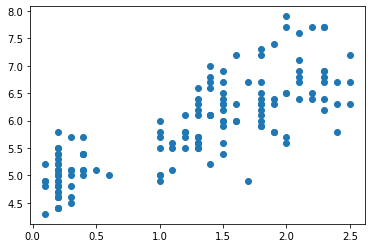

In [11]:
plt.plot(x_vals,y_vals, 'o')

In [80]:
learning_rate = 0.05
batch_size = 30
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

$$y = Ax+b$$

In [72]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [73]:
loss_l2 = tf.reduce_mean(tf.square(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l2)
init = tf.global_variables_initializer()
session.run(init)

In [74]:
loss_vect_l2 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l2, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l2.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[2.1809034]], b=[[2.5834885]], Loss = 1.9443761
Paso #20, A=[[2.0254395]], b=[[3.0522566]], Loss = 1.2754004
Paso #30, A=[[1.8316722]], b=[[3.3549957]], Loss = 0.6329244
Paso #40, A=[[1.6211481]], b=[[3.6348805]], Loss = 0.7022467
Paso #50, A=[[1.486194]], b=[[3.8740525]], Loss = 0.3474526
Paso #60, A=[[1.3902714]], b=[[4.0789375]], Loss = 0.31285736
Paso #70, A=[[1.2749505]], b=[[4.2173324]], Loss = 0.27762586
Paso #80, A=[[1.2083294]], b=[[4.336579]], Loss = 0.2864847
Paso #90, A=[[1.1090616]], b=[[4.40045]], Loss = 0.13498901
Paso #100, A=[[1.107424]], b=[[4.465499]], Loss = 0.2236529


In [75]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(str(slope)+"x"+str(intercept))

1.107424x4.465499


In [76]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

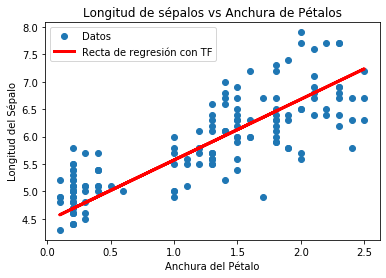

In [77]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

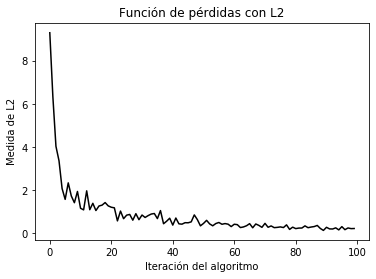

In [78]:
plt.plot(loss_vect_l2, "k-")
plt.title("Función de pérdidas con L2")
plt.xlabel("Iteración del algoritmo")
plt.ylabel("Medida de L2")
plt.show()

In [79]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [81]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [82]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [83]:
loss_l1 = tf.reduce_mean(tf.abs(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l1)
init = tf.global_variables_initializer()
session.run(init)

In [85]:
loss_vect_l1 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l1, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l1.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[0.44808996]], b=[[1.4336165]], Loss = 4.0228286
Paso #20, A=[[1.0784233]], b=[[1.933616]], Loss = 2.6913605
Paso #30, A=[[1.64159]], b=[[2.4302824]], Loss = 1.550589
Paso #40, A=[[1.9084233]], b=[[2.780282]], Loss = 0.9769224
Paso #50, A=[[1.9262565]], b=[[2.9869485]], Loss = 0.8843471
Paso #60, A=[[1.89959]], b=[[3.1669483]], Loss = 0.9226405
Paso #70, A=[[1.8239232]], b=[[3.273615]], Loss = 0.65245575
Paso #80, A=[[1.7509232]], b=[[3.3902814]], Loss = 0.698014
Paso #90, A=[[1.7025896]], b=[[3.5236146]], Loss = 0.7002719
Paso #100, A=[[1.6549231]], b=[[3.6502812]], Loss = 0.5689908


In [86]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(str(slope)+"x"+str(intercept))

1.6549231x3.6502812


In [87]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

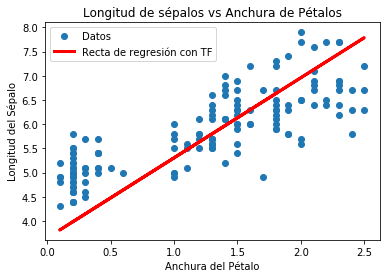

In [88]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

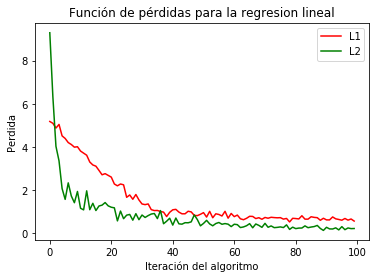

In [92]:
plt.plot(loss_vect_l1, "r-", label="L1")
plt.plot(loss_vect_l2, "g-", label="L2")
plt.title("Función de pérdidas para la regresion lineal")
plt.xlabel("Iteración del algoritmo")
plt.ylabel("Perdida")
plt.legend(loc = "upper right")
plt.show()